### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

_Keep in mind that these values mentioned below are average values._

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
print('Dimensions of data read in (rows x columns): {}'.format(data.shape))

Dimensions of data read in (rows x columns): (12684, 26)


**%Completeness of each column - is there any missing data?**

In [12]:
data.isnull().sum().transform(lambda x: (1 - (x / data.shape[0])) * 100).round(2)

destination             100.00
passanger               100.00
weather                 100.00
temperature             100.00
time                    100.00
coupon                  100.00
expiration              100.00
gender                  100.00
age                     100.00
maritalStatus           100.00
has_children            100.00
education               100.00
occupation              100.00
income                  100.00
car                       0.85
Bar                      99.16
CoffeeHouse              98.29
CarryAway                98.81
RestaurantLessThan20     98.98
Restaurant20To50         98.51
toCoupon_GEQ5min        100.00
toCoupon_GEQ15min       100.00
toCoupon_GEQ25min       100.00
direction_same          100.00
direction_opp           100.00
Y                       100.00
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

* Drop car column: only 0.85% rows have values
* Keep the rest of the columns at this time - on average 98% rows have non-null data
    * Will decide later as we answer specific questions what to do about incomplete rows

In [14]:
car_nulls = data.car.isnull().sum()
data = data.drop(labels=('car'), axis=1)
print('Dropped column \'car\' since {} of {} rows are null - only {:.2f}% useful rows!'
      .format(car_nulls, data.shape[0], (1 - (car_nulls / data.shape[0])) * 100)
)

Dropped column 'car' since 12576 of 12684 rows are null - only 0.85% useful rows!


4. What proportion of the total observations chose to accept the coupon? 

    **Strategy**

    * Data Prep:
        * Create new dataframe using Groupby Y and pull out the Y column
        * Grab the value_counts()
        * Add a new column 'Responses' and convert Y=(0,1) -> Responses=('Rejected','Accepted') for labels
    * Visualization: Pie chart
        * Generate and prettify graph


In [123]:
# Prep data for Pie chart
acceptance_rate_pie = data.groupby('Y')['Y'].value_counts().rename('Responses').reset_index()

# Calculate overall acceptance rate
nayes = acceptance_rate_pie.iloc[0, 1]
ayes = acceptance_rate_pie.iloc[1, 1]
acceptance_rate = (ayes / data.shape[0]) * 100

print('Overall Coupon Acceptance Rate: {:.2f}%'
      .format(acceptance_rate))
print('{} accepted and {} did not from a total of {} responses'
      .format(ayes, nayes, data.shape[0]))

#acceptance_rate_pie

Overall Coupon Acceptance Rate: 56.84%
7210 accepted and 5474 did not from a total of 12684 responses


Text(0.5, 1.0, 'Overall Coupon Acceptance Rate')

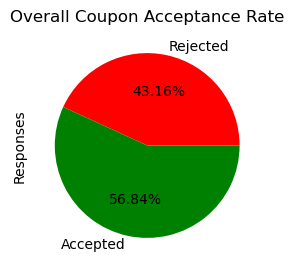

In [125]:
names = ('Rejected', 'Accepted')
colors = ('red', 'green')
plt.rcParams['figure.figsize'] = (3,3)

acceptance_rate_pie.plot.pie(y='Responses',
                             autopct='%1.2f%%', 
                             labels=names,
                             colors=colors,
                             legend=False
                            )
plt.title('Overall Coupon Acceptance Rate')

5. Use a bar plot to visualize the `coupon` column.

    **Strategy**

    * Data Prep
        * Create new dataframe to Groupby coupon and pull out the Y column
        * Grab the value_counts()
        * Add a new column 'Responses' and convert Y=(0,1) -> Responses=('Rejected','Accepted') for labels
    * Generate and prettify graph


In [128]:
# Use groupby to marshall Responses in new column with values based on column Y
coupon = (data
          .groupby('coupon')['Y']
          .value_counts()
          .reset_index()
         )

# Convert Y=(0,1) -> Responses=('Rejected','Accepted') for labels
coupon.loc[coupon.Y == 0, 'Responses'] = 'Rejected'
coupon.loc[coupon.Y == 1, 'Responses'] = 'Accepted'
coupon#.head()

,coupon,Y,count,Responses
0,Bar,0,1190,Rejected
1,Bar,1,827,Accepted
2,Carry out & Take away,1,1760,Accepted
3,Carry out & Take away,0,633,Rejected
4,Coffee House,0,2001,Rejected
5,Coffee House,1,1995,Accepted
6,Restaurant(20-50),0,834,Rejected
7,Restaurant(20-50),1,658,Accepted
8,Restaurant(<20),1,1970,Accepted
9,Restaurant(<20),0,816,Rejected


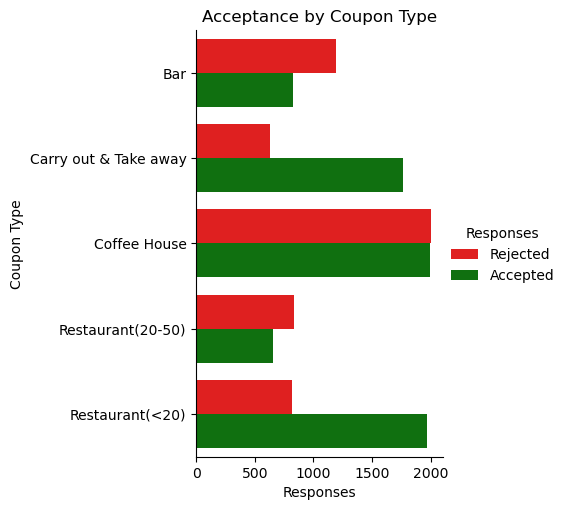

In [130]:
# Generate graph and prettify

plt.rcParams["figure.figsize"] = (7,5)

sns.catplot(data=coupon, kind='bar',
            y='coupon', x='count', hue='Responses',
            palette={'Rejected':'red', 'Accepted':'green'}
           )
plt.title('Acceptance by Coupon Type')
plt.xlabel('Responses')
plt.ylabel('Coupon Type')
plt.show()

6. Use a histogram to visualize the temperature column.

    **Strategy**

    * No data prep needed - we can just graph it

<Axes: xlabel='temperature', ylabel='Count'>

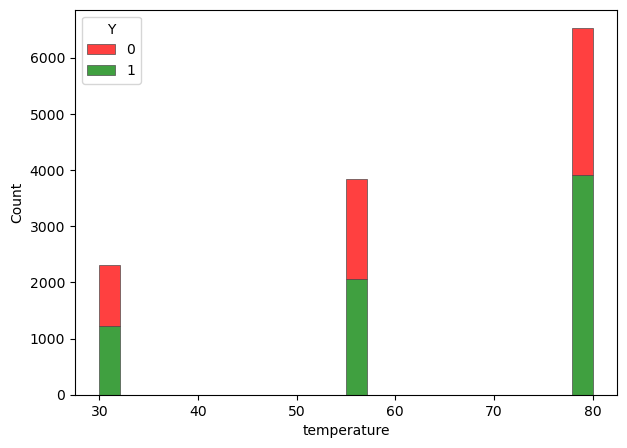

In [133]:
# No prep needed, just graph it

plt.rcParams["figure.figsize"] = (7,5)

sns.histplot(
    data=data,
    x='temperature', hue='Y',
    multiple='stack', #bins=50,
    edgecolor='.3', linewidth=.5,
    palette=['red','green'] #, alpha=0.5,
)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.

    **Strategy**

    * Make a new copy of the 'curated' from earlier called 'coupons_bar'
    * Replace the NAN values with 'Missing' so we can track it and deal with it downstream if necessary
        * 21 rows are tagged with Bar Coupon type as 'Missing'

In [136]:
# Make a new copy of the "curated" from earlier

coupons_bar = data.copy();
coupons_bar = coupons_bar[data.coupon == 'Bar']
coupons_bar.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1


In [138]:
# Replace the NAN values with 'Missing' so we can track it and deal with it downstream if necessary
coupons_bar.Bar = coupons_bar.Bar.fillna(value='Missing')
coupons_bar[['Bar']].value_counts()

Bar    
never      830
less1      570
1~3        397
4~8        150
gt8         49
Missing     21
Name: count, dtype: int64

2. What proportion of bar coupons were accepted?

    **Strategy**

    * Calcualte the Bar Coupon Acceptance Rate using coupons_bar.shape
    * Visualize the data in a couple of different ways 
        * Visualization 1: Pie chart of overall Bar Coupon Acceptance Rate
        * Visualization 2: Bar graph of Bar Coupon Acceptance distribution


In [158]:
acceptance_rate_bar = (coupons_bar[coupons_bar['Y'] == 1].shape[0] / coupons_bar.shape[0]) * 100
print('Bar Coupon Acceptance Rate: {:.2f}%'.format(acceptance_rate_bar))

Bar Coupon Acceptance Rate: 41.00%


**Visualization 1: Pie chart of Bar Coupon Acceptance Rate**

* Data Prep: Create acceptanece_rate_pie DF using groupby('Y').value_counts()
* Fix the labels and set the color appropriately as above

Text(0.5, 1.0, 'Bar Coupon Acceptance Rate')

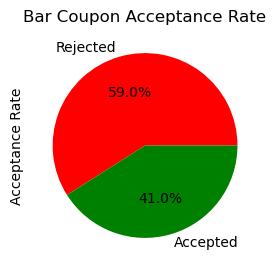

In [161]:
# Create the DF for the graph
acceptance_rate_pie = coupons_bar.groupby('Y')['Y'].value_counts().rename('Acceptance Rate').reset_index()

# Prettify graph
names = ('Rejected', 'Accepted')
colors = ('red', 'green')
plt.rcParams["figure.figsize"] = (3,3)

acceptance_rate_pie.plot.pie(y='Acceptance Rate',
                             autopct='%1.1f%%', 
                             labels=names,
                             colors=colors,
                             legend=False
                            )
plt.title('Bar Coupon Acceptance Rate')

**Visualization 2: Bar graph of Bar Coupon Acceptance distribution**
* Data Prep
    * Create new DF with counts of each coupon type groupby('Bar').value_counts()
    * Create a pivot table with each row containing both acceptance and rejection per coupon type
    * Calculate totals and acceptance rate for each row (bucket)
    * Manually order the buckets so they x-axis appear 'natural'
* Bar graph: Fix the labels and set the color appropriately as above


In [176]:
# Bar acceptance buckets by count
dfc = (coupons_bar
      .groupby('Bar')['Y']
      .value_counts()
      .reset_index()
)
#dfc

In [179]:
p = dfc.pivot(index='Bar', columns='Y', values='count').reset_index()
p['total'] = p[0] + p[1]
p['rate'] = (p[1] / p['total']).mul(100).round(2)
#p

In [181]:
# Manually sort based on frequency of visiting a bar
col_order = [2, 5, 4, 0, 1, 3]
p = p.reindex(col_order)
p

Y,Bar,0,1,total,rate
2,Missing,13,8,21,38.10
5,never,674,156,830,18.80
4,less1,317,253,570,44.39
0,1~3,140,257,397,64.74
1,4~8,33,117,150,78.00
3,gt8,13,36,49,73.47


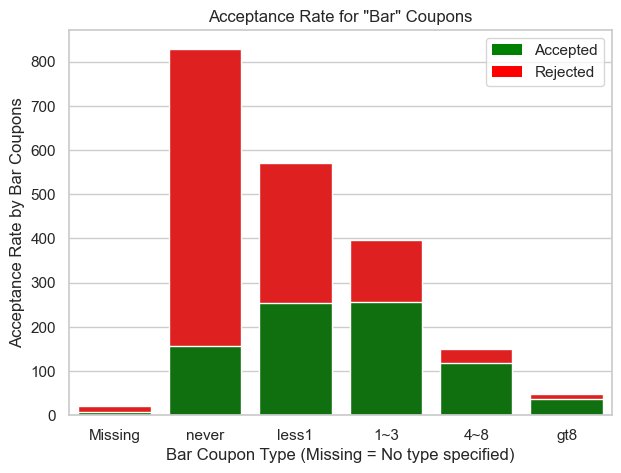

In [189]:
# graph it now
plt.rcParams["figure.figsize"] = (7,5)
sns.set_theme(style='whitegrid', palette=None)

# Start the bar plot using the totals in red
sns.barplot(x = p.Bar, y = p.total, color = 'red')

# Overlay with accepted as green
accepted = sns.barplot(x = p.Bar, y = p[1], color = "green")

# Create the legend
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='green',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Accepted', 'Rejected'], loc=0)
#l.draw_frame(False)

#sns.despine(left=True)
accepted.set_ylabel("Acceptance Rate by Bar Coupons")
accepted.set_xlabel("Bar Coupon Type (Missing = No type specified)")
accepted.set_title('Acceptance Rate for "Bar" Coupons')

plt.show()


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  